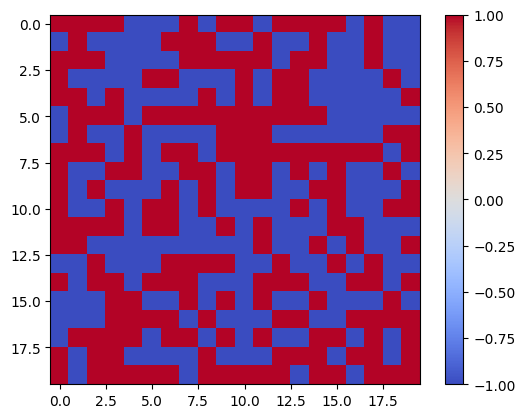

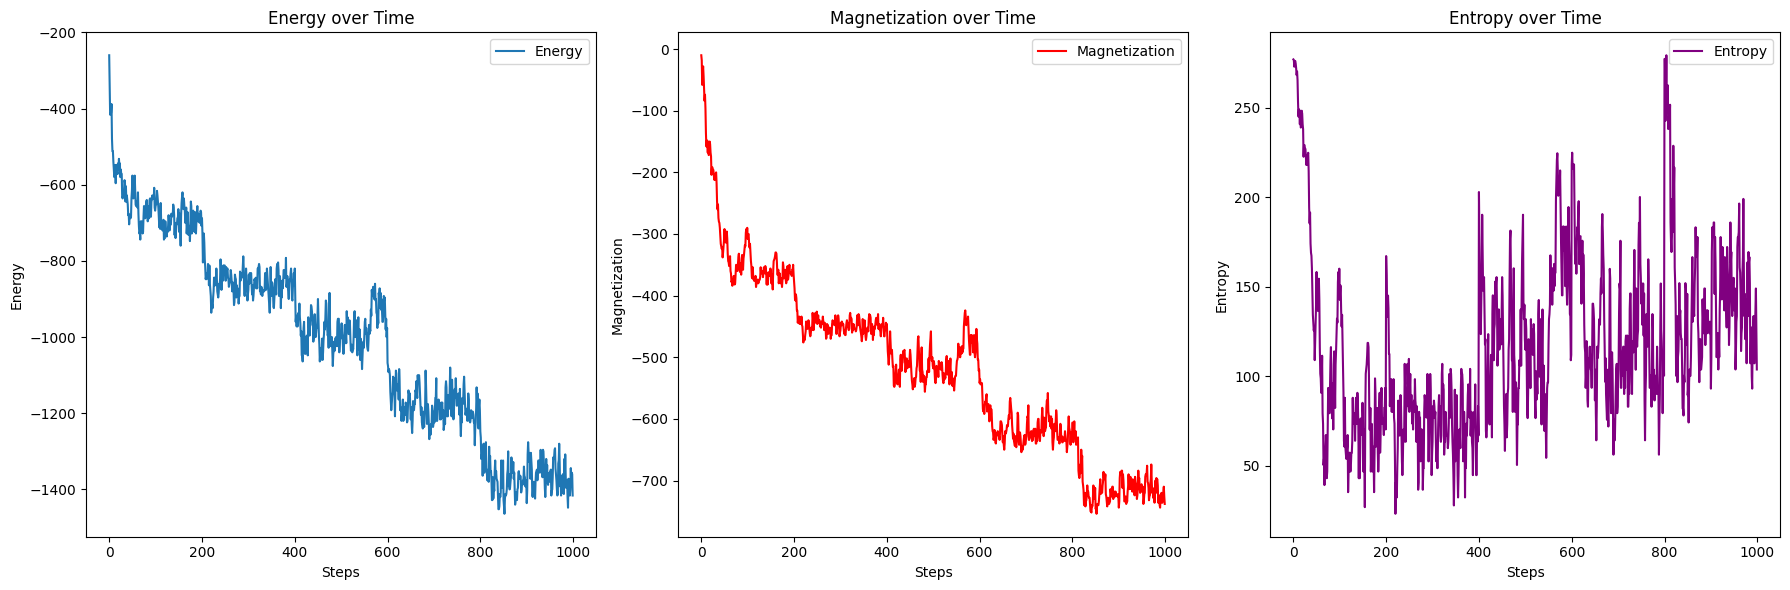

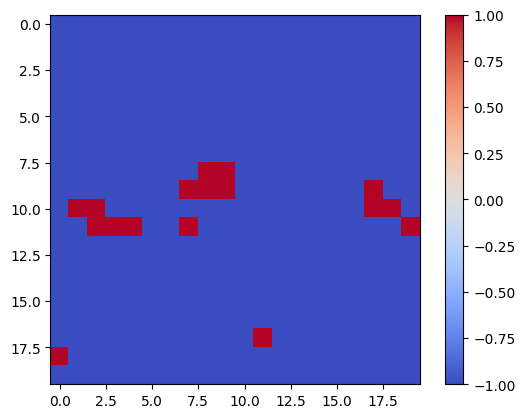

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
initial_L = 20  # Initial lattice size
steps = 1000  # Number of simulation steps
prob_add = 0.01  # Probability of flipping a spin to +1
prob_remove = 0.01  # Probability of flipping a spin to -1
expand_interval = 200  # Interval at which the lattice expands
expand_size = 2  # Amount by which the lattice size increases
J = 1  # Interaction strength
k_B = 1  # Boltzmann constant
T = 2.0  # Temperature

# Initialize the lattice with random spins (-1 or +1)
L = initial_L
lattice = np.random.choice([-1, 1], size=(L, L))

def display_lattice(lattice):
    plt.imshow(lattice, cmap='coolwarm')
    plt.colorbar()
    plt.show()

# Function to calculate the energy of a given spin configuration
def calculate_energy(lattice, J):
    energy = 0
    L = lattice.shape[0]
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            energy += -J * S * neighbors
    return energy / 2  # Each pair counted twice

# Function to expand the lattice
def expand_lattice(lattice, expand_size):
    L = lattice.shape[0]
    new_L = L + expand_size
    new_lattice = np.random.choice([-1, 1], size=(new_L, new_L))
    new_lattice[:L, :L] = lattice
    return new_lattice

# Function to gather and plot statistical data
def gather_statistics(lattice, steps, prob_add, prob_remove, expand_interval, expand_size, J, k_B, T):
    energies = []
    magnetizations = []
    entropies = []

    for step in range(steps):
        if step > 0 and step % expand_interval == 0:
            lattice = expand_lattice(lattice, expand_size)

        L = lattice.shape[0]
        for _ in range(L*L):
            i = random.randint(0, L-1)
            j = random.randint(0, L-1)
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            delta_E = 2 * J * S * neighbors

            if delta_E < 0 or random.random() < np.exp(-delta_E / (k_B * T)):
                lattice[i, j] *= -1

        # Flip spins with a given probability
        if random.random() < prob_add:
            while True:
                i = random.randint(0, L-1)
                j = random.randint(0, L-1)
                if lattice[i, j] == -1:
                    lattice[i, j] = 1
                    break

        if random.random() < prob_remove:
            while True:
                i = random.randint(0, L-1)
                j = random.randint(0, L-1)
                if lattice[i, j] == 1:
                    lattice[i, j] = -1
                    break

        energy = calculate_energy(lattice, J)
        magnetization = np.sum(lattice)
        p = (magnetization + L*L) / (2 * L*L)
        if p > 0 and p < 1:
            entropy = -L*L * (p * np.log(p) + (1 - p) * np.log(1 - p))
        else:
            entropy = 0

        energies.append(energy)
        magnetizations.append(magnetization)
        entropies.append(entropy)

    return energies, magnetizations, entropies

def plot_statistics(energies, magnetizations, entropies, steps):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.plot(range(steps), energies)
    plt.xlabel('Steps')
    plt.ylabel('Energy')
    plt.title('Energy over Time')
    plt.legend(['Energy'])

    plt.subplot(1, 3, 2)
    plt.plot(range(steps), magnetizations, label='Magnetization', color='red')
    plt.xlabel('Steps')
    plt.ylabel('Magnetization')
    plt.title('Magnetization over Time')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(range(steps), entropies, label='Entropy', color='purple')
    plt.xlabel('Steps')
    plt.ylabel('Entropy')
    plt.title('Entropy over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display initial configuration
display_lattice(lattice)

# Gather statistics
energies, magnetizations, entropies = gather_statistics(lattice, steps, prob_add, prob_remove, expand_interval, expand_size, J, k_B, T)

# Plot statistics
plot_statistics(energies, magnetizations, entropies, steps)

# Display final configuration
display_lattice(lattice)


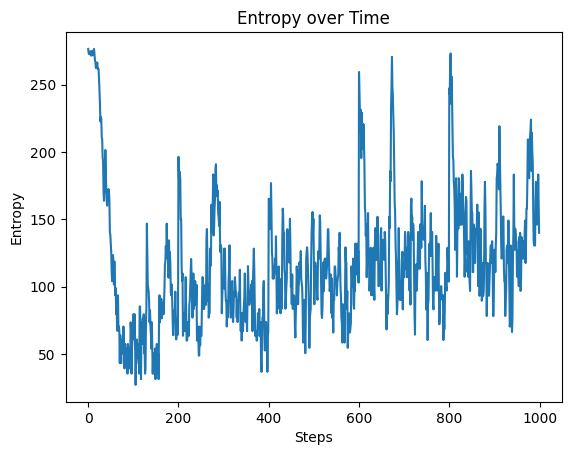

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
initial_L = 20  # Initial lattice size
steps = 1000  # Number of simulation steps
prob_add = 0.01  # Probability of flipping a spin to +1
prob_remove = 0.01  # Probability of flipping a spin to -1
expand_interval = 200  # Interval at which the lattice expands
expand_size = 2  # Amount by which the lattice size increases
J = 1  # Interaction strength
k_B = 1  # Boltzmann constant
T = 2.0  # Temperature

# Initialize the lattice with random spins (-1 or +1)
L = initial_L
lattice = np.random.choice([-1, 1], size=(L, L))

# Function to calculate the energy of a given spin configuration
def calculate_energy(lattice, J):
    energy = 0
    L = lattice.shape[0]
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            energy += -J * S * neighbors
    return energy / 2  # Each pair counted twice

# Function to expand the lattice
def expand_lattice(lattice, expand_size):
    L = lattice.shape[0]
    new_L = L + expand_size
    new_lattice = np.random.choice([-1, 1], size=(new_L, new_L))
    new_lattice[:L, :L] = lattice
    return new_lattice

# Function to gather and plot statistical data
def gather_statistics(lattice, steps, prob_add, prob_remove, expand_interval, expand_size, J, k_B, T):
    entropies = []

    for step in range(steps):
        if step > 0 and step % expand_interval == 0:
            lattice = expand_lattice(lattice, expand_size)

        L = lattice.shape[0]
        for _ in range(L*L):
            i = random.randint(0, L-1)
            j = random.randint(0, L-1)
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            delta_E = 2 * J * S * neighbors

            if delta_E < 0 or random.random() < np.exp(-delta_E / (k_B * T)):
                lattice[i, j] *= -1

        # Flip spins with a given probability
        if random.random() < prob_add:
            while True:
                i = random.randint(0, L-1)
                j = random.randint(0, L-1)
                if lattice[i, j] == -1:
                    lattice[i, j] = 1
                    break

        if random.random() < prob_remove:
            while True:
                i = random.randint(0, L-1)
                j = random.randint(0, L-1)
                if lattice[i, j] == 1:
                    lattice[i, j] = -1
                    break

        magnetization = np.sum(lattice)
        p = (magnetization + L*L) / (2 * L*L)
        if p > 0 and p < 1:
            entropy = -L*L * (p * np.log(p) + (1 - p) * np.log(1 - p))
        else:
            entropy = 0

        entropies.append(entropy)

    return entropies

# Gather statistics
entropies = gather_statistics(lattice, steps, prob_add, prob_remove, expand_interval, expand_size, J, k_B, T)

# Plot entropy
plt.plot(entropies)
plt.xlabel('Steps')
plt.ylabel('Entropy')
plt.title('Entropy over Time')
plt.show()


Epoch 1/200
25/25 [==============================] - 2s 19ms/step - loss: 3330.2253 - val_loss: 1427.2936
Epoch 2/200
25/25 [==============================] - 0s 7ms/step - loss: 708.4738 - val_loss: 842.7847
Epoch 3/200
25/25 [==============================] - 0s 7ms/step - loss: 558.4484 - val_loss: 750.3052
Epoch 4/200
25/25 [==============================] - 0s 7ms/step - loss: 514.9974 - val_loss: 725.2029
Epoch 5/200
25/25 [==============================] - 0s 7ms/step - loss: 483.6386 - val_loss: 642.3281
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 464.1209 - val_loss: 617.9819
Epoch 7/200
25/25 [==============================] - 0s 8ms/step - loss: 462.4906 - val_loss: 657.9113
Epoch 8/200
25/25 [==============================] - 0s 8ms/step - loss: 468.3222 - val_loss: 626.3573
Epoch 9/200
25/25 [==============================] - 0s 7ms/step - loss: 442.3299 - val_loss: 567.5681
Epoch 10/200
25/25 [==============================] - 0s 8ms/step - lo

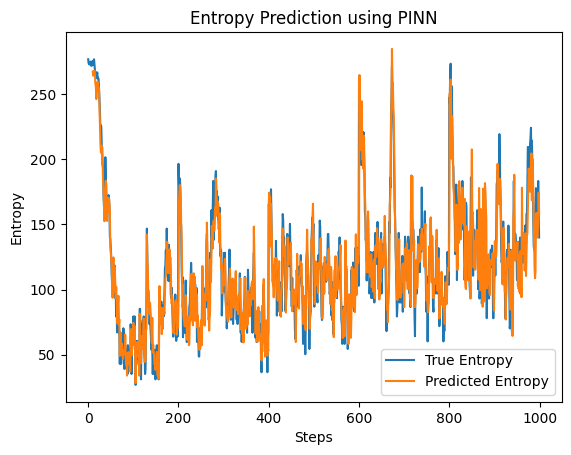

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# Prepare the data for time series prediction
def prepare_data(entropies, time_steps):
    X, y = [], []
    for i in range(len(entropies) - time_steps):
        X.append(entropies[i:i + time_steps])
        y.append(entropies[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = prepare_data(entropies, time_steps)

# Reshape the data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X, y, epochs=200, validation_split=0.2, verbose=1)

# Make predictions
predictions = model.predict(X)

# Plot the results
plt.plot(entropies, label='True Entropy')
plt.plot(np.arange(time_steps, time_steps + len(predictions)), predictions.flatten(), label='Predicted Entropy')
plt.xlabel('Steps')
plt.ylabel('Entropy')
plt.title('Entropy Prediction using PINN')
plt.legend()
plt.show()
